# 📘 Workshop: Intro to Machine Learning with Diabetes Dataset

In [6]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#  Jupyter magic command to render plots inline.
%matplotlib inline 

## 📊 1. Load and Explore the Diabetes Dataset

In [9]:
#Let's Load and Explore the Diabetes Toy Dataset

diabetes = load_diabetes() #Let's load the actual diabetes toy dataset

print(diabetes.keys()) #what columns/features/metadata does this data contain? Try printing out some of them i.e description of the data and the columns
print(diabetes.DESCR)  #get a full description of the dataset
print(diabetes.feature_names)  #get a full description of the dataset


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log 

In [15]:
#create a pandas dataframe called X that loads the diabetes data and set the column names to be the feature names from the dataset
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

#create a pandas Series called y that loads the target values with the name "target" we're trying to predict
y = pd.Series(diabetes.target, name="target")

X.head()  
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

# Visualize Data
Let's look at the data.

In [19]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


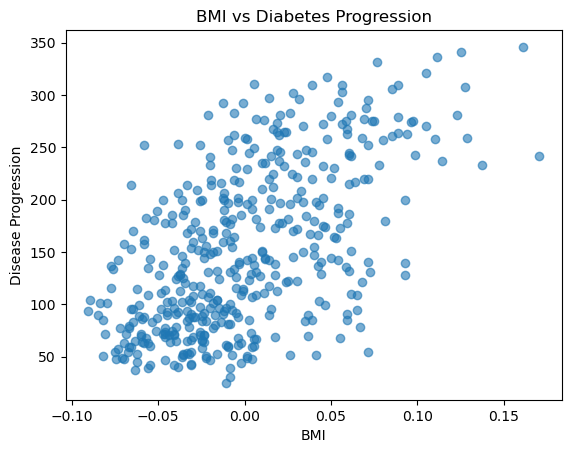

In [23]:

# Create a scatter plot of BMI vs Disease Progression
alpha=0.6 #makes the points semi-transparent for better visualization

plt.scatter(X["bmi"], y, alpha=0.6)  #Update Code Here: pass the proper values to plot the bmi data

# Plot : No need to change code below.
plt.title("BMI vs Diabetes Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")

# Display the final plot
plt.show()


## 📈 2. Linear Regression with SGDRegressor

In [29]:


# Split the dataset into training and test sets
# 80% for training and 20% for testing, with a fixed random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #call the train_test_split built in function

# Initialize a Stochastic Gradient Descent Regressor
# - loss='squared_error' means it minimizes mean squared error
# - learning_rate='constant' with eta0=0.01 sets a fixed step size of 0.01
# - max_iter=1000 limits to 1000 iterations
#call the SGDRegressor built in function using a learning rate of 0.01 and 1000 epochs
sgd = SGDRegressor(loss="squared_error", learning_rate="constant", eta0=0.01, max_iter=1000, random_state=42)
# Fit (train) the model on the training data
# train the sgd model using the training features and training target
sgd.fit(X_train, y_train)

# Make predictions on the test set
# create a variable called y_pred that calculates the predictions using the test data
y_pred=sgd.predict(X_test)

# Calculate and print the mean squared error on the test set
#print out the MSE using the test and prediction data
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


Mean Squared Error on Test Set: 2962.6309576656713


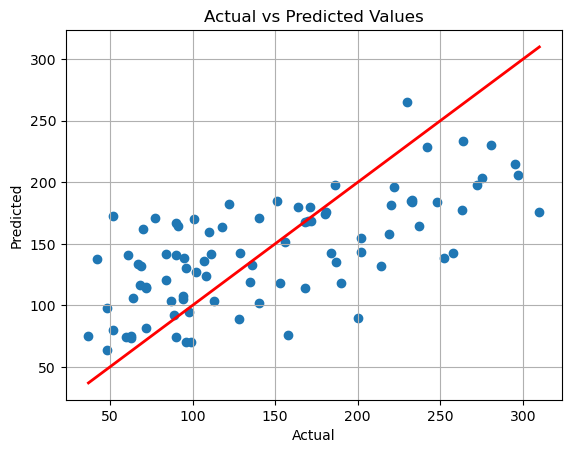

This plots what the model guessed (predicted) vs what the actual value really was. The closer your points are to the red line, the better your model.


In [31]:
# Create a scatter plot comparing the actual vs predicted values
# This helps visualize how well the model's predictions match the true values
plt.scatter(y_test, y_pred)

# Plot a red diagonal line representing the ideal case where predicted = actual
# It goes from the min to max of y_test on both axes
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

# Add a title and axis labels to describe the plot
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Add a grid for easier reading of the plot
plt.grid(True)

# Display the final plot
plt.show()
print("This plots what the model guessed (predicted) vs what the actual value really was. The closer your points are to the red line, the better your model.")

## 🎛️ 3. Hyperparameters

In [33]:

print(f"Learning rate used: {sgd.eta0}")
print(f"Max iterations (epochs): {sgd.max_iter}")
# 🧪 Try changing these and see the effect on MSE
print("Batch Size: 1 since we're doing SGD")

Learning rate used: 0.01
Max iterations (epochs): 1000
Batch Size: 1 since we're doing SGD


## ⚙️ 4. Learning Rate Comparison
Analyze how LR affects convergeance

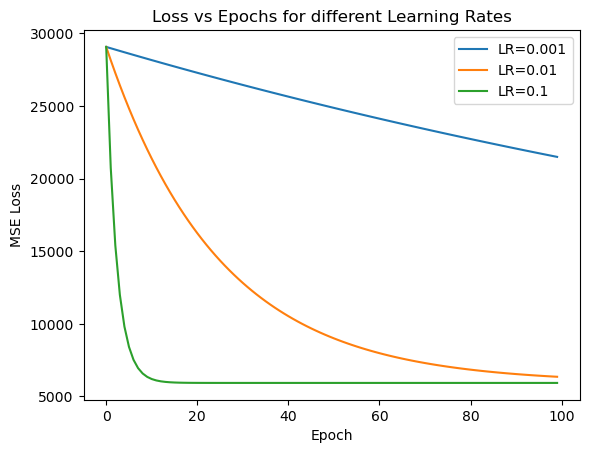


Summary of learning rates impact:
- Lower learning rates (e.g., 0.001) converge slowly, taking many epochs to reduce loss.
- Moderate learning rates (e.g., 0.01) often strike a balance between speed and stability.
- High learning rates (e.g., 0.1) reduce loss quickly but risk overshooting or oscillating.
=> Choosing the right learning rate is crucial for fast and stable convergence.


In [36]:

#This code uses manual gradient descent to fit a simple linear model
# predicting diabetes progression from BMI, compares how different learning rates
# affect convergence, and plots the loss over epochs to visualize it.

# Extract the 'bmi' column as a NumPy array
X_bmi = X[["bmi"]].values

# Extract the target progression values as a NumPy array
y_vals = y.values

# Standardize BMI feature: subtract mean and divide by std to get mean=0, std=1
X_bmi = (X_bmi - X_bmi.mean()) / X_bmi.std()

# List of different learning rates to compare
rates = [0.001, 0.01, 0.1]

# Loop over each learning rate
for rate in rates:
    m, b = 0.0, 0.0  # Initialize slope (m) and intercept (b)
    losses = []      # To store MSE loss for each epoch

    # Perform 100 manual epochs of gradient descent
    for _ in range(100):
        # Compute predicted values based on current m and b
        y_pred = m * X_bmi + b

        # Calculate error (residuals)
        error = y_vals - y_pred

        # Compute gradients for m and b (partial derivatives of MSE)
        m_grad = -2 * (X_bmi * error).mean()
        b_grad = -2 * error.mean()

        # Update parameters by moving against the gradient
        m -= rate * m_grad
        b -= rate * b_grad

        # Compute and store the mean squared error loss for this epoch
        losses.append(mean_squared_error(y_vals, y_pred))

    # After training, plot the loss curve for this learning rate
    plt.plot(losses, label=f"LR={rate}")

# Add legend, title, and axis labels to the plot
plt.legend()
plt.title("Loss vs Epochs for different Learning Rates")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

print("\nSummary of learning rates impact:")
print("- Lower learning rates (e.g., 0.001) converge slowly, taking many epochs to reduce loss.")
print("- Moderate learning rates (e.g., 0.01) often strike a balance between speed and stability.")
print("- High learning rates (e.g., 0.1) reduce loss quickly but risk overshooting or oscillating.")
print("=> Choosing the right learning rate is crucial for fast and stable convergence.")

